Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'EOS'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-06-30,1.031340,1.071760,0.989566,1.006690,1.006690,13613000.0,EOS-USD
2017-07-01,0.996521,2.877510,0.822648,2.710050,2.710050,320452000.0,EOS-USD
2017-07-02,2.717390,5.395970,2.632310,4.086640,4.086640,414950016.0,EOS-USD
2017-07-03,4.098010,4.191240,2.933450,3.372000,3.372000,218559008.0,EOS-USD
2017-07-04,3.356000,3.523500,2.730130,3.003230,3.003230,124339000.0,EOS-USD
...,...,...,...,...,...,...,...
2021-07-02,3.926595,4.060837,3.859586,4.046421,4.046421,730270296.0,EOS-USD
2021-07-03,4.048645,4.181861,3.952532,4.059930,4.059930,808602549.0,EOS-USD
2021-07-04,4.061888,4.061888,3.773130,3.819266,3.819266,800403331.0,EOS-USD
2021-07-05,3.814236,4.004299,3.797596,3.882325,3.882325,696787462.0,EOS-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1468 entries, 2017-06-30 to 2021-07-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1464 non-null   float64
 1   high      1464 non-null   float64
 2   low       1464 non-null   float64
 3   close     1464 non-null   float64
 4   adjclose  1464 non-null   float64
 5   volume    1464 non-null   float64
 6   ticker    1468 non-null   object 
 7   spread    1464 non-null   float64
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


## Plot the closing value of EOS over time

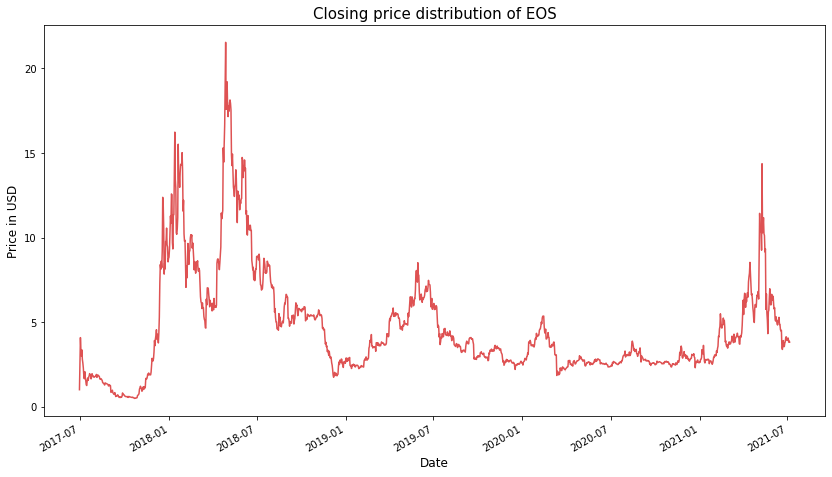

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of EOS", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of EOS')

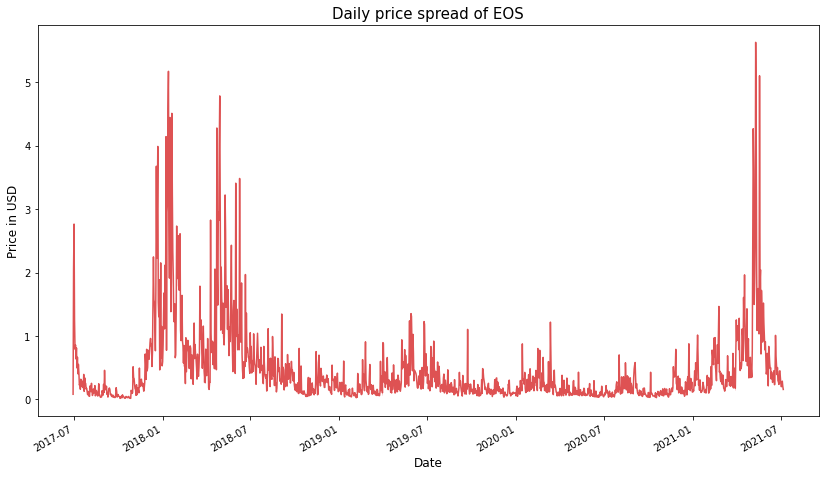

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of EOS", fontsize=15)

## Candlestick chart

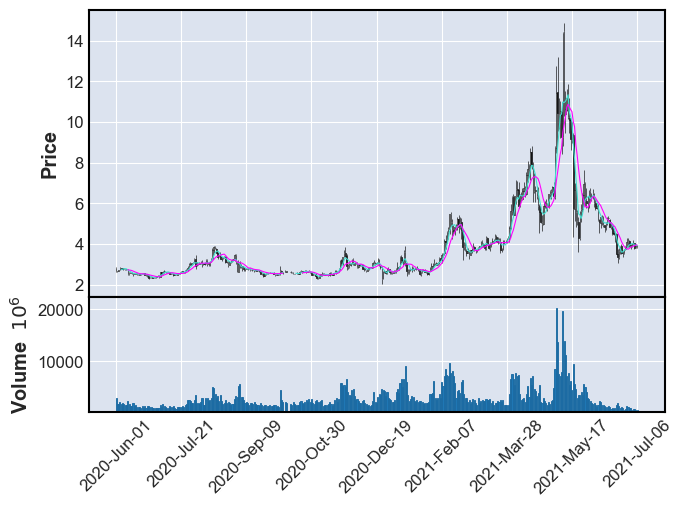

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2017-06-30,1.006690
1,2017-07-01,2.710050
2,2017-07-02,4.086640
3,2017-07-03,3.372000
4,2017-07-04,3.003230
...,...,...
1463,2021-07-02,4.046421
1464,2021-07-03,4.059930
1465,2021-07-04,3.819266
1466,2021-07-05,3.882325


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1489,2021-08-01,2.541623,1.153811,4.090159
1490,2021-08-02,2.492908,0.952685,4.068327
1491,2021-08-03,2.415663,0.908206,3.981219
1492,2021-08-04,2.406564,0.910570,3.997064
1493,2021-08-05,2.309183,0.719825,3.893751


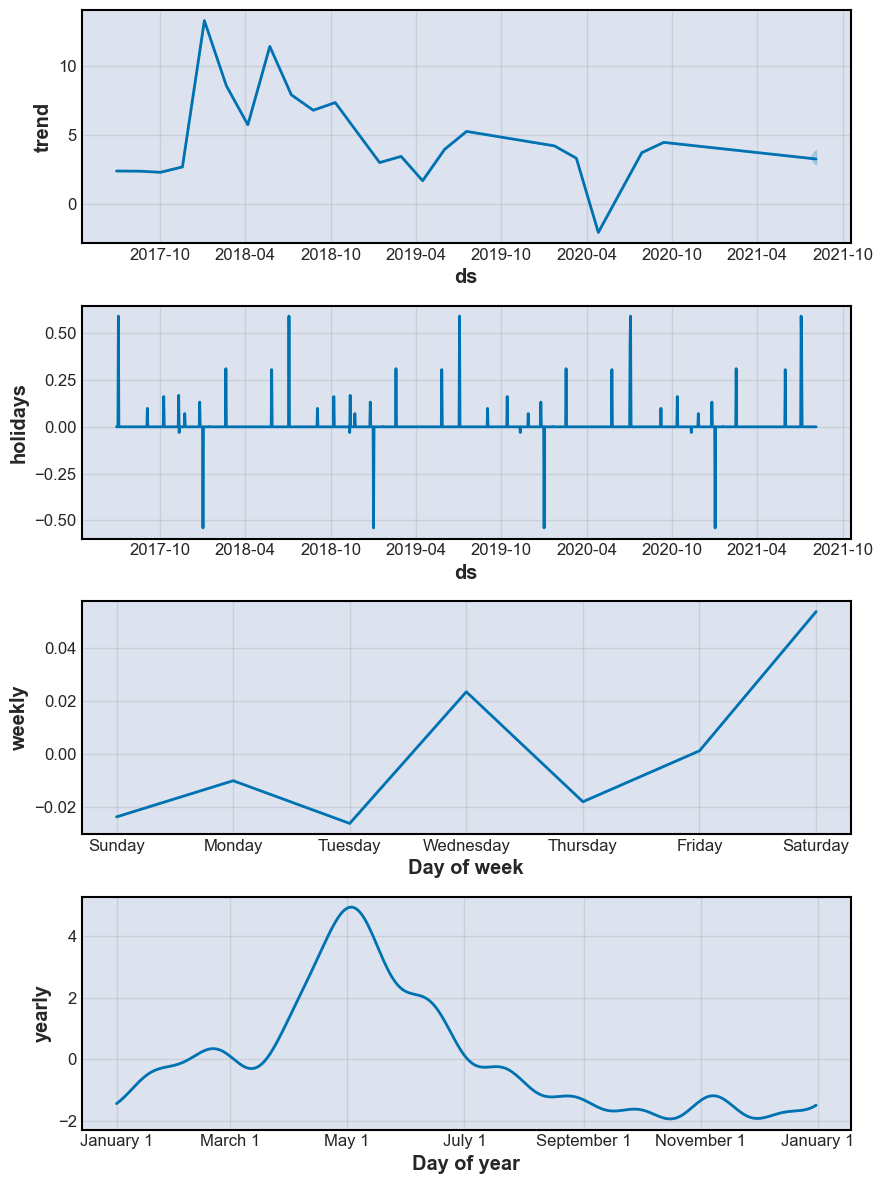

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

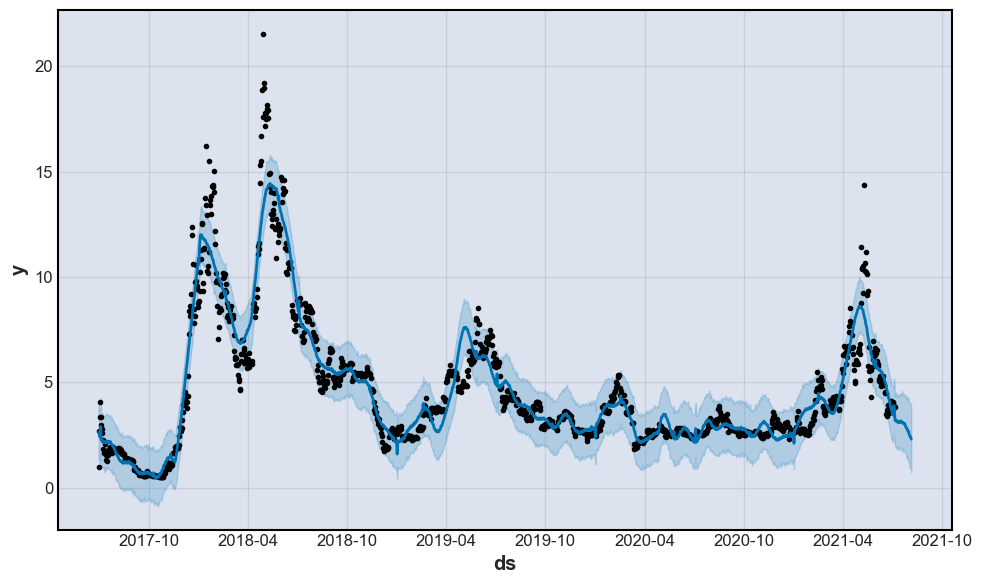

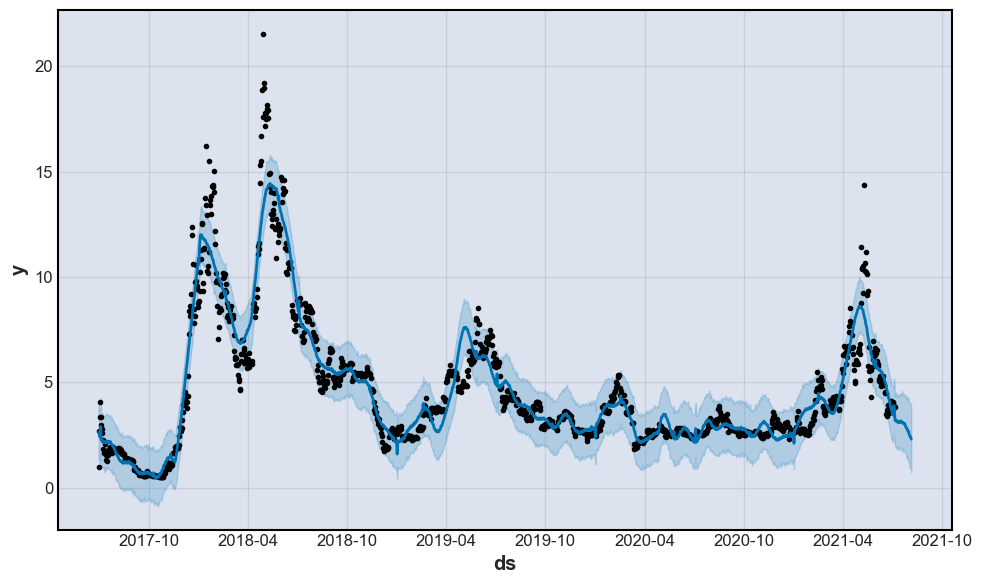

In [10]:
m.plot(forecast)